<a href="https://colab.research.google.com/github/greenpenguinkaa/greenpenguinkaa/blob/main/Face%20and%20Sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tempfile

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import tensorflow as tf
import tensorflow_datasets as tfds

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# **Задача 1**

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv

--2024-12-13 04:47:36--  https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_news.csv.3’

fake_news.csv.3     100%[===================>]  29.27M  8.75MB/s    in 4.2s    

2024-12-13 04:47:42 (6.98 MB/s) - ‘fake_news.csv.3’ saved [30696129/30696129]



In [ ]:
df = pd.read_csv("./fake_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Создание объекта TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Применение TF-IDF к текстовым данным
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Получение списка ключевых слов и их значения TF-IDF для документа
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Сортировка слов по значениям TF-IDF
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords)

Ключевые слова: ['fbi', 'the', 'comey', 'that', 'of', 'hillary', 'her', 'to', 'and', 'clinton', 'it', 'is', 'has', 'investigation', 'kgb', 'fear', 'setup', 'panicked', 'associates', 'unprecedented', 'hatch', 'was', 'clintonworld', 'awkwardly', 'gone', 'james', 'afraid', 'hubris', 'but', 'war', 'hoover', 'bigger', 'scandal', 'on', 'campaign', 'desperation', 'she', 'act', 'email', 'are', 'he', 'whatever', 'with', 'doj', 'violating', 'countless', 'an', 'smoke', 'bizarre', 'stretch', 'really', 'emails', 'accusing', 'victory', 'credibility', 'scandals', 'they', 'in', 'around', 'media', 'out', 'director', 'spinmeisters', 'explosively', 'attack', 'their', 'election', 'or', 'be', 'tells', 'just', 'time', 'clintons', 'agents', 'you', 'old', 'glancing', 'breezy', 'behavior', 'him', 'democrats', 'people', 'shillman', 'outdone', 'coma', 'being', 'assault', 'letter', 'carville', 'against', 'spouting', 'lambasting', 'irritating', 'illegality', 'wing', 'warned', 'knew', 'cover', 'weathered', 'all', '

In [ ]:
# Определение порога для отбора ключевых слов
threshold = 0.2
important_words = [word for word, score in zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]) if score >= threshold]
print("Важные слова:", important_words)

Важные слова: ['comey', 'fbi', 'the']


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


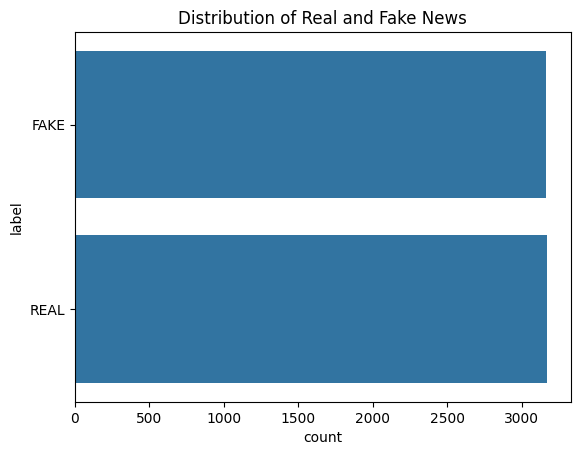

In [ ]:
labels = df.label
print(labels.head())

target = df.label.value_counts()
print(target)

sns.countplot(df.label)
plt.title("Distribution of Real and Fake News")
plt.show()

In [ ]:
# разделяем дата сет на выборки
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df['text'],
labels, test_size=0.2,
random_state=7)

In [ ]:
# удалем стоп слова
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train = tfidf.fit_transform(xtrain)
test = tfidf.transform(xtest)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(train, ytrain)

ypred = pac.predict(test)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy Score of Passive Aggresive Scassifier: {round(accuracy*100,2)}%')
print("Матрица ошибок: \n",confusion_matrix(ytest, ypred, labels=["FAKE", "REAL"]))

Accuracy Score of Passive Aggresive Scassifier: 92.9%
Матрица ошибок: 
 [[591  47]
 [ 43 586]]


## **Задача 2**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
features = df.loc[:,df.columns!='status'].values[:, 1:]
labels = df.loc[:, 'status'].values

In [ ]:
#Масштабирование
scaler = MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


# **Задача 3**

Определение лица и пола по фотографии


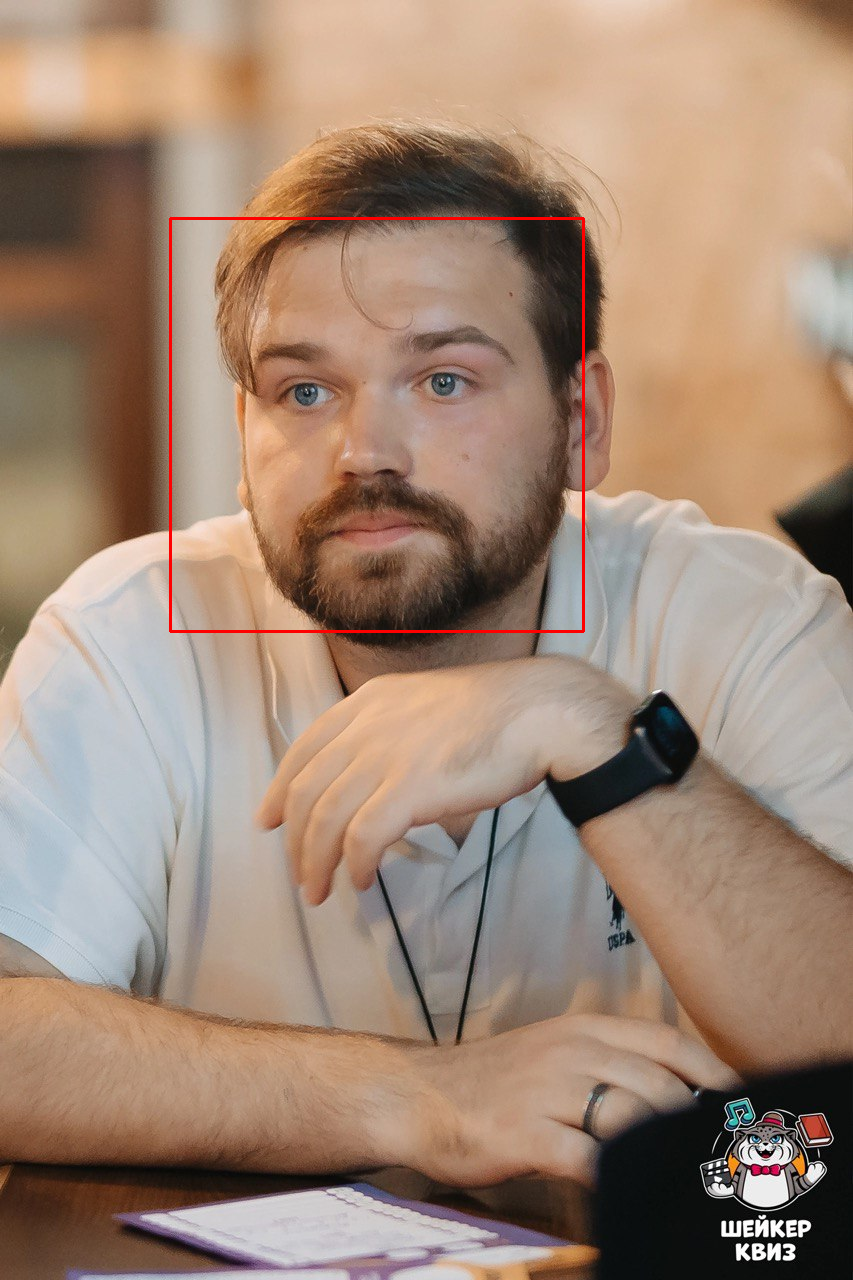

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# создаём переменную с файлом модели
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# читаем изображение
image = cv2.imread('foto1.jpg')


# обесцвечиваем изображение
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# находим лица на обесцвеченном изображении
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# на цветном изображении рисуем квадраты там, где нашли лица на обесцвеченном
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# открываем изображение в отдельном окне
cv2_imshow(image)



In [ ]:
genderProto="gender_deploy.prototxt"
genderModel="gender_net.caffemodel"

In [ ]:
# для каждого лица на изображении определяем пол
for (x, y, w, h) in faces:
    blob=cv2.dnn.blobFromImage(image, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
# загружаем лицо в нейросеть для определения пола
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
# выбираем пол на основе этого результата
    gender=genderList[genderPreds[0].argmax()]
    print(f'Gender: {gender}')

Gender: Male 
